In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df_original = dataset['train'].to_pandas()

# Data Cleansing
df_original['job_posted_date'] = pd.to_datetime(df_original['job_posted_date'])
df_original['job_skills'] = df_original['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_altered = df_original.copy()
df_DA_US = df_altered[(df_altered['job_title_short']== 'Data Analyst') & (df_altered['job_country']== 'United States')]
#drops NaN values
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [ ]:
df_DA_US['salary_year_avg'].sample(10) #Data sample 10 times

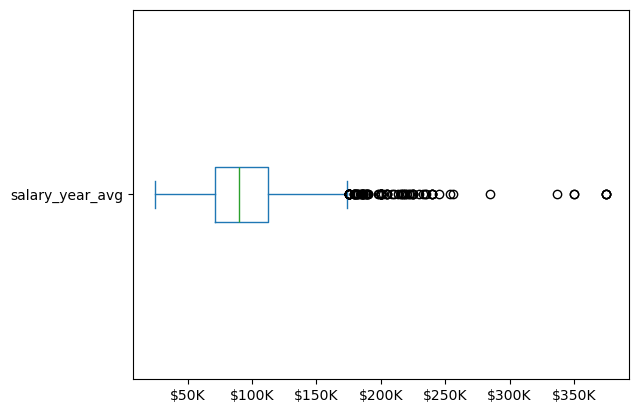

In [4]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False) # works the same plt.boxplot(df_DA_US['salary_year_avg'])
#50% in the box, min and max lines (calculated by formula, not real min and max), if real MIN < or real MAX > those are outliers
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: f'${int(x/1000)}K'))

C:\Users\OlegNovikovInMyCase\AppData\Local\Temp\ipykernel_15500\2573872861.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


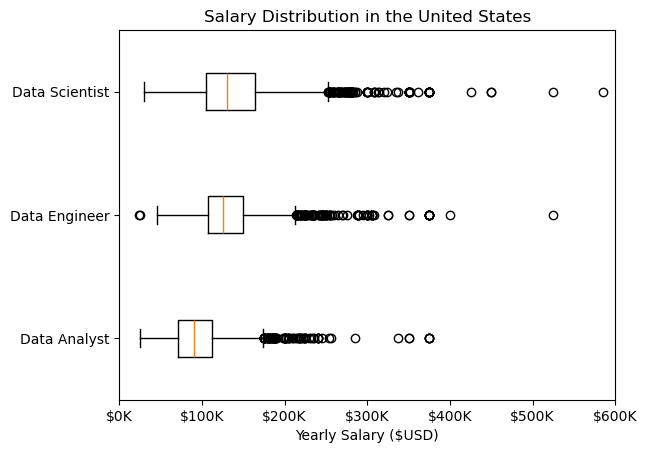

In [5]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_US = df_altered[(df_altered['job_title_short'].isin(job_titles)) & (df_altered['job_country']== 'United States')]
df_US = df_US.dropna(subset=['salary_year_avg'])
# df_US['job_title_short'].value_counts()  - testing if everything works
job_list = [df_US[df_US['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States') 
plt.xlabel('Yearly Salary ($USD)') 
plt.xlim(0,600000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: f'${int(x/1000)}K'))
plt.show()

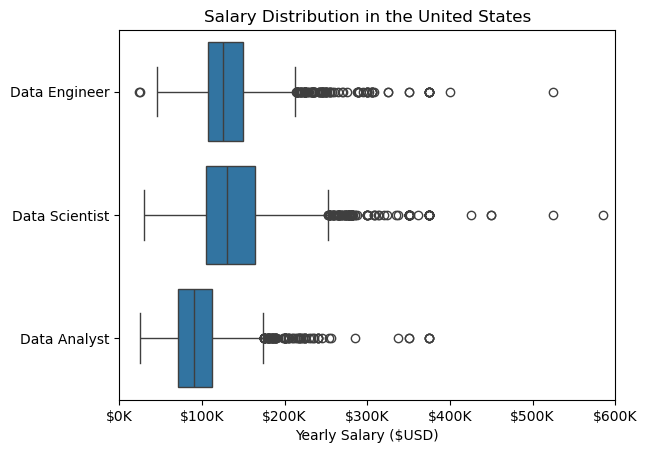

In [11]:
import seaborn as sns
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')
plt.title('Salary Distribution in the United States') 
plt.xlabel('Yearly Salary ($USD)') 
plt.ylabel('')
plt.xlim(0,600000)
ticks_x = plt.FuncFormatter(lambda x, position: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()